# Binary Search Trees

## Lesson Overview

> A **binary search tree** is a specialized binary tree that enforces a requirement that for all nodes, all nodes in the node's left subtree must be less than the node's value, and all nodes in the node's right subtree must be greater than the node's value.

For example, the following tree is a binary search tree:

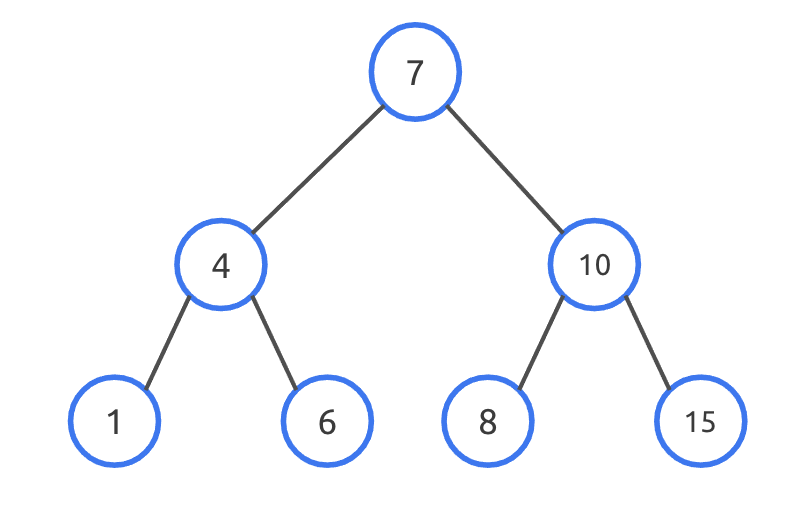

To fully verify a tree as a binary search tree, we must apply our criteria *recursively*. For example, nodes in 4's right subtree must be greater than 4, and *also* less than 7, since 7 is the ancestor of the entire left subtree.

Is the following tree a binary search tree?

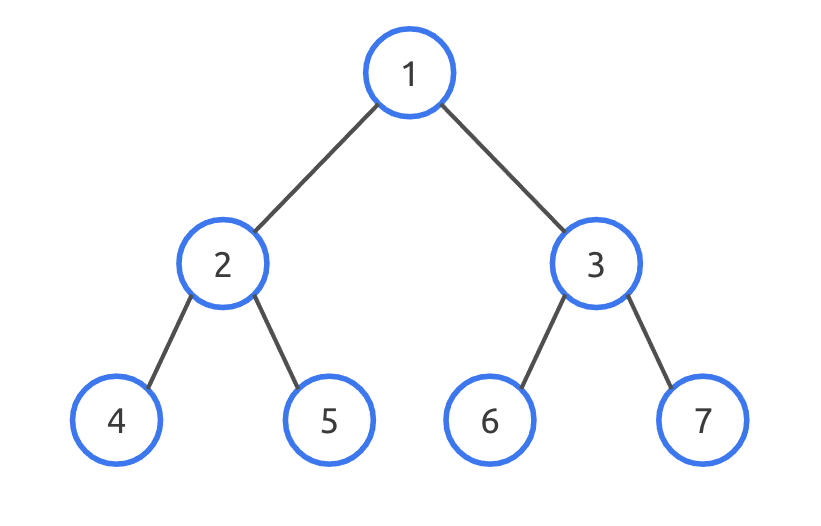

This is definitely a complete binary tree. But is it a binary search tree? We can attempt to verify it visually. If we look at the root node, $1$, we should check to see if its left subtree contains only values greater than $1$ and if its right subtree contains values less than $1$. Checking the left subtree, $2 > 1$, however, so this tree fails our verification and is not a binary search tree.

If every node in our tree passes the verification criteria, we can say that this is a binary search tree. In most implementations of binary search trees, duplicates may exist, but it requires that we change our requirement to a node's left subtree containing nodes that are less than *or equal to* the node, and a node's right subtree containing nodes that are greater than *or equal to* the node. In that case, the following tree would also be a valid binary search tree:

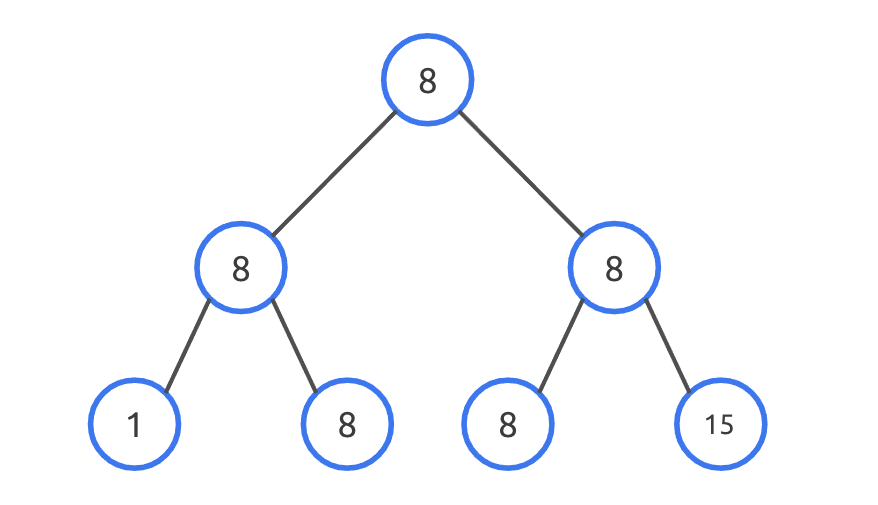

Recall that the binary search algorithm allows us to find an element in a sorted array in $O(\log(n))$ time. Binary search works by repeatedly splitting the array in half and only continuing to search the half that contains the desired element. The binary search tree is an explicit representation of that search algorithm as a data structure, which lets us quickly find, insert, and remove elements.

In [ ]:
#persistent
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    # "left" and "right" here refer to the left and right children of the node.
    self.left = None
    self.right = None

  def get_parent(self):
    return self.parent

  def __str__(self):
    if not self.left and not self.right:
      return '%s' % (self.name)
    if not self.left:
      return '%s: %s' % (self.name, ['', self.right.name])
    if not self.right:
      return '%s: %s' % (self.name, [self.left.name, ''])
    return '%s: %s' % (self.name, [self.left.name, self.right.name])

  def __repr__(self):
    if not self.left and not self.right:
      return '%s' % (self.name)
    if not self.left:
      return '%s: %s' % (self.name, ['', self.right.name])
    if not self.right:
      return '%s: %s' % (self.name, [self.left.name, ''])
    return '%s: %s' % (self.name, [self.left.name, self.right.name])

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

## Question 1

Which of the following statements about a binary search tree are true?

**a)** A binary search tree must have the median value as the root.

**b)** In a binary search tree, each node may have up to two children.

**c)** Binary search trees can only store integer values.

**d)** Binary search trees support rapid retrieval of elements, since they're stored in sorted order.

### Solution

The correct answers are **b)** and **d)**.

**a)** Valid binary search trees can exist that don't have the median value at the root, though they may end up being asymmetric.

**c)** Binary search trees can store any type of data as long as it can be sorted as "greater than" or "less than" another element. For example, binary search trees can store floats and strings.

## Question 2

Given the following tree, select all correct statements.

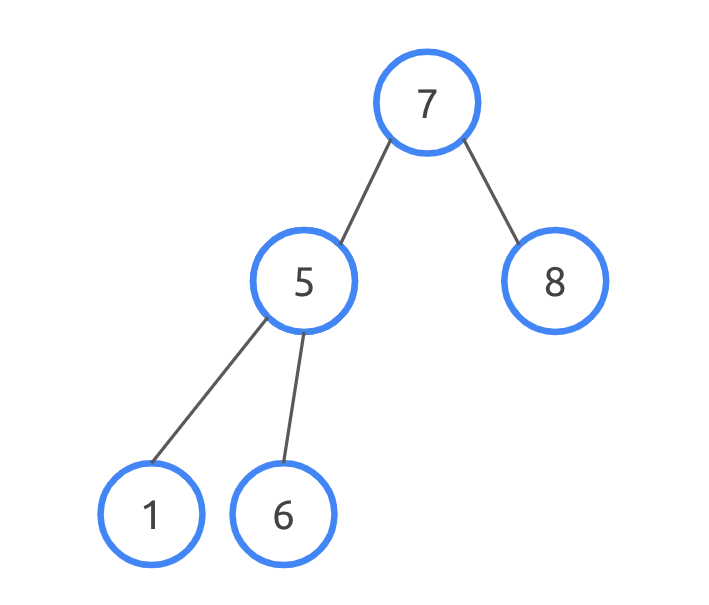

**a)** This tree is a binary tree.

**b)** This tree is a binary search tree.

**c)** This tree has a height of 4.

**d)** This tree is also a graph.

### Solution

The correct answers are **a)**, **b)**, and **d)**.

**c)** The tree has a height of 3.

## Question 3

Which of the following trees are valid binary search trees? (Consider "valid" to allow duplicates, so nodes in a given node's left/right subtree can contain values less/greater than *or equal to* the node's value respectively.)

**a)** 

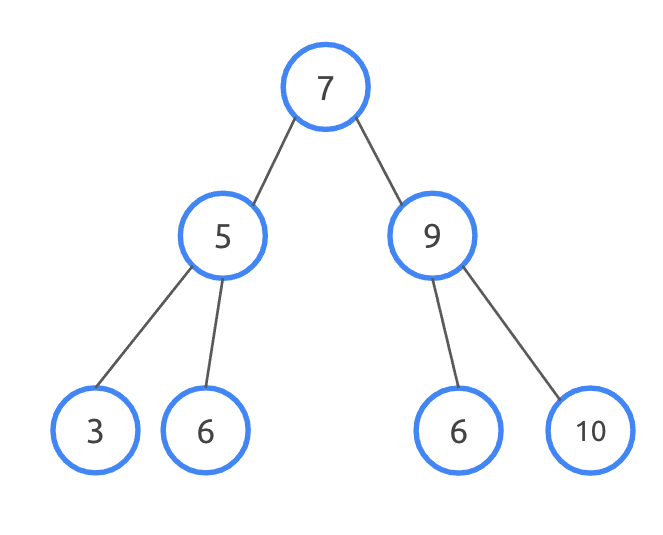

**b)** 

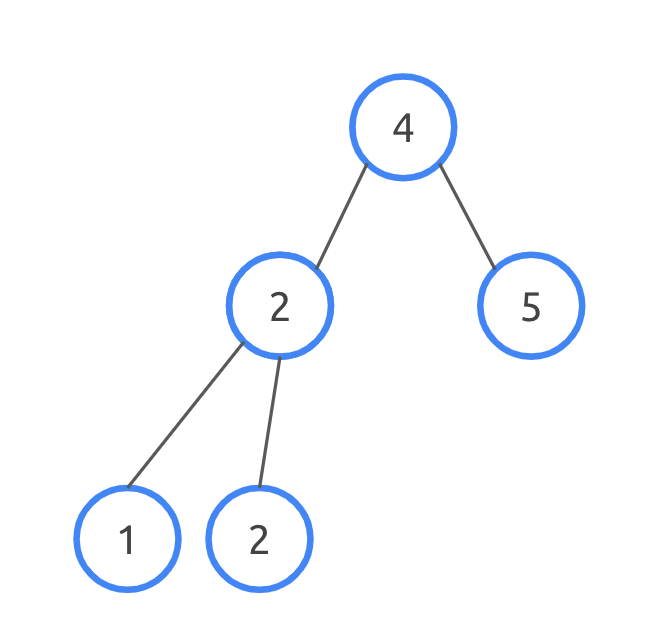

**c)** 

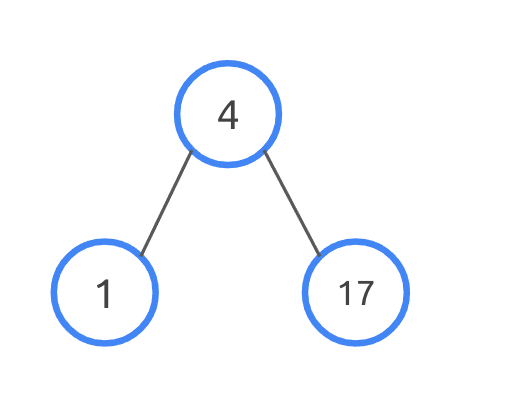

### Solution

The correct answers are **b)** and **c)**.

**a)** $7$'s right subtree contains the value $6$.

## Question 4

Write a `size` method for a binary search tree that returns the number of nodes in the tree. Keep in mind that this will be very similar to existing `size` methods for other trees.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    # "left" and "right" here refer to the left and right children of the node.
    self.left = None
    self.right = None

  def get_parent(self):
    return self.parent

  def __str__(self):
    if not self.left and not self.right:
      return '%s' % (self.name)
    if not self.left:
      return '%s: %s' % (self.name, ['', self.right.name])
    if not self.right:
      return '%s: %s' % (self.name, [self.left.name, ''])
    return '%s: %s' % (self.name, [self.left.name, self.right.name])

  def __repr__(self):
    if not self.left and not self.right:
      return '%s' % (self.name)
    if not self.left:
      return '%s: %s' % (self.name, ['', self.right.name])
    if not self.right:
      return '%s: %s' % (self.name, [self.left.name, ''])
    return '%s: %s' % (self.name, [self.left.name, self.right.name])

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

You can reuse any traversal code with a few tweaks, as long as you make sure you go through every node in the binary search tree. Here's an outline to get you started on the recursive helper:

```python
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    # Add your traversal and recursion code here.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
bst = BinarySearchTree(Node(4))
bst.root.left = Node(2)
bst.root.right = Node(5)
print(bst.size())
# Should print: 3

bst.root.left.left = Node(1)
bst.root.left.right = Node(3)
print(bst.size())
# Should print: 5

### Solution

This is one possible way to write this using a pre-order traversal. Since we aren't performing any operation on the current node, in-order, pre-order, and post-order traversal algorithms are going to be very similar in terms of code. The critical thing is to make sure you have a case in mind for if `left` or `right` don't exist. Here, we return 0.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) +
            self._size_helper(current_node.right))

## Question 5

Next, let's assume we have a proper binary search tree that we know to be valid. We need to find a way to return elements from this data structure when requested.

Write a `search` method for the `BinarySearchTree` class that returns the node within the binary search tree containing that value if it exists in the tree and `None` otherwise. You may assume the tree contains no duplicates.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

This method can be written iteratively or recursively, but recall that for a given node, nodes greater than it will be in its right subtree, and nodes less than it will be in its left subtree.

If you choose to write this recursively and need some help getting started, here's the wrapper for the recursion.

```python
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    # Check if the node is the node you're looking for.
    # If you want a greater-value node, check the right subtree.
    # If you want a lower-value node, check the left subtree.
    pass
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
bst = BinarySearchTree(Node(4))
bst.root.left = Node(2)
bst.root.right = Node(5)
print(bst.search(3))
# Should print: None

bst.root.left.left = Node(1)
bst.root.left.right = Node(3)
print(bst.search(2))
# Should print: 2: [1, 3]

### Solution

Don't forget to check if the node is `None`, or don't iterate to a child that doesn't exist. Check the current node and if it's not a match, recursively check the left and right subtrees.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    # Two base cases for our recursion.
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node

    # Otherwise, use the binary search tree's properties to check the left
    # and right subtrees.
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

## Question 6

Add an `add_node` method to the `BinarySearchTree` class that takes a value and adds a new node to the binary search tree containing that value. You can assume that the binary search tree is always well-defined and has a root node.

We also need a way to add nodes to the binary search tree. Recall that nodes less than a given node go in that node's left subtree and nodes greater than a node go in that node's right subtree. By keeping that true, we can write a recursive `add_node` method that adds a new node to the binary search tree without violating any of its properties.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

You can reuse a lot of code from the `search` method, as this follows the same algorithm. The key change is that instead of going to `left` or `right` if they don't exist (and then returning `None`), create a new node and add that to `left` or `right`, depending on where the new node should go.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
bst = BinarySearchTree(Node(4))
bst.add_node(2)
bst.add_node(5)
print(bst.search(3))
# Should print: None

bst.add_node(1)
bst.add_node(3)
print(bst.search(2))
# Should print: 2: [1, 3]

### Solution

Don't forget to connect the new node back to its parent, as well.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    self._add_node_helper(self.root, value)

  def _add_node_helper(self, current_node, value):
    # Our recursion should never bottom out, so we won't have a base case, here.

    # We should use the binary search tree's properties to check the left and 
    # right subtrees, but before we recurse, we should check to see if the node
    # exists. If not, we add it and return instead of recursing.
    if value <= current_node.name:
      if not current_node.left:
        new_node = Node(value)
        current_node.left = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.left, value)
    if value >= current_node.name:
      if not current_node.right:
        new_node = Node(value)
        current_node.right = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.right, value)

## Question 7

Write an `is_balanced` method for the `BinarySearchTree` class that returns `True` if it is balanced, and `False` otherwise.

After adding nodes, you may notice that the binary search tree's structure may not mirror many trees you've seen before. For example, take this binary search tree with root 10:

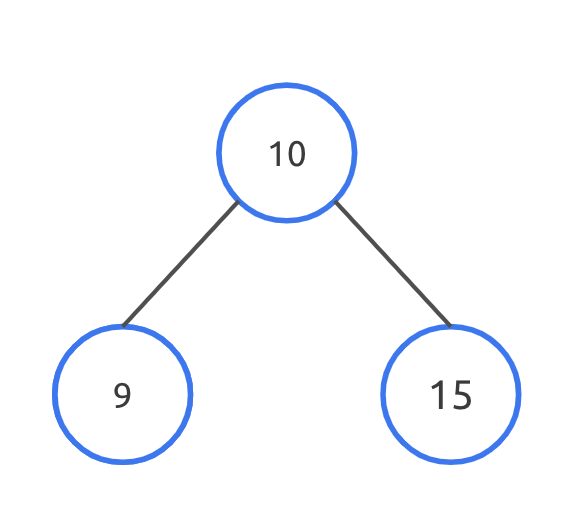

If we were to call `add_node(4)`, then `add_node(7)`, and then `add_node(3)`, we would end up with a binary search tree that looks like this:

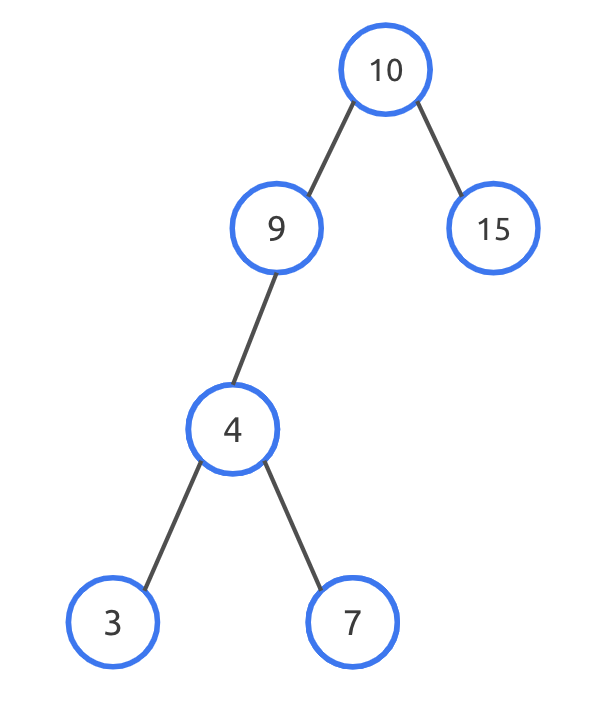

This is still a valid binary search tree! It looks lopsided, though, as most of the nodes are on the left subtree. This binary search tree would be called **unbalanced**. A **balanced** binary search tree with the same nodes would look like this:

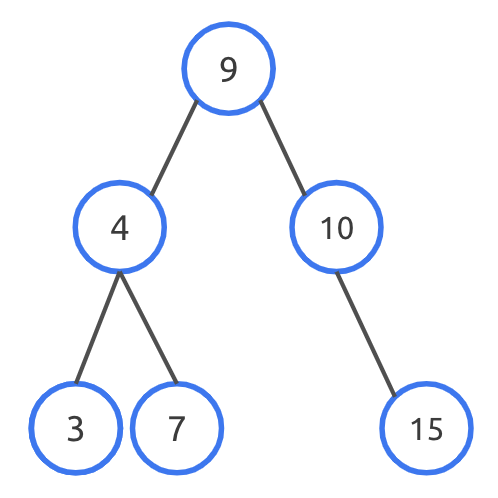

In general, a binary search tree is said to be **height-balanced** if, at every node, the absolute difference between its left and right subtrees is no more than 1. In the case of the tree being a single root node, we assume it is balanced, since the height of each of its subtrees is 0.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    self._add_node_helper(self.root, value)

  def _add_node_helper(self, current_node, value):
    if value <= current_node.name:
      if not current_node.left:
        new_node = Node(value)
        current_node.left = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.left, value)
    if value >= current_node.name:
      if not current_node.right:
        new_node = Node(value)
        current_node.right = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.right, value)

  def is_balanced(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

This problem is a little tricky, becuase you're calculating the height at every point in the tree. There are a few ways to do that, some more efficient than others.

Recall, for a tree, that a single root node is height 1. From there, every tree can be represented as a root node with children, where each child is the "root" of the subtree represented by its children. Thinking about it like that, a tree's height is just 1 + the maximum height of its children's subtrees.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
bst = BinarySearchTree(Node(4))
print(bst.is_balanced())
# Should print: True

bst.add_node(2)
bst.add_node(5)
print(bst.is_balanced())
# Should print: True

bst.add_node(1)
bst.add_node(3)
bst.add_node(0)
print(bst.is_balanced())
# Should print: False

### Solution

We opted to simplify our code a bit and add a `height` method to our binary search tree class, but you don't need to do that. Don't forget to include a special case for the root node.

While this solution is correct, it is not the most efficient way to calculate this, as we are recalculating the height of the subtrees at every node. Can you implement a more efficient solution?

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    self._add_node_helper(self.root, value)

  def _add_node_helper(self, current_node, value):
    if value <= current_node.name:
      if not current_node.left:
        new_node = Node(value)
        current_node.left = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.left, value)
    if value >= current_node.name:
      if not current_node.right:
        new_node = Node(value)
        current_node.right = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.right, value)

  def get_height(self):
    return self._get_height_helper(self.root)

  def _get_height_helper(self, current_node):
    if not current_node:
      return 0
    max_height = -1
    left_height = self._get_height_helper(current_node.left)
    if left_height > max_height:
      max_height = left_height
    right_height = self._get_height_helper(current_node.right)
    if right_height > max_height:
      max_height = right_height
    return 1 + max_height

  def is_balanced(self):
    return self._is_balanced_helper(self.root)

  def _is_balanced_helper(self, current_node):
    if not current_node:
      return True
    left_subtree_height = self._get_height_helper(current_node.left)
    right_subtree_height = self._get_height_helper(current_node.right)
    if abs(left_subtree_height - right_subtree_height) > 1:
      return False
    else:
      return (self._is_balanced_helper(current_node.left) and 
              self._is_balanced_helper(current_node.right))

## Question 8

We know that a binary search tree stores its elements in an easily-searched order, but that order is also a valid sorted order if the nodes are retrieved correctly. This means that elements added to a binary search tree can be retrieved in sorted order, provided we use an in-order traversal.

Write a method to retrieve elements from a binary search tree, `get_elements_inorder`.

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    self._add_node_helper(self.root, value)

  def _add_node_helper(self, current_node, value):
    if value <= current_node.name:
      if not current_node.left:
        new_node = Node(value)
        current_node.left = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.left, value)
    if value >= current_node.name:
      if not current_node.right:
        new_node = Node(value)
        current_node.right = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.right, value)

  def get_height(self):
    return self._get_height_helper(self.root)

  def _get_height_helper(self, current_node):
    if not current_node:
      return 0
    max_height = -1
    left_height = self._get_height_helper(current_node.left)
    if left_height > max_height:
      max_height = left_height
    right_height = self._get_height_helper(current_node.right)
    if right_height > max_height:
      max_height = right_height
    return 1 + max_height

  def is_balanced(self):
    return self._is_balanced_helper(self.root)

  def _is_balanced_helper(self, current_node):
    if not current_node:
      return True
    left_subtree_height = self._get_height_helper(current_node.left)
    right_subtree_height = self._get_height_helper(current_node.right)
    if abs(left_subtree_height - right_subtree_height) > 1:
      return False
    else:
      return (self._is_balanced_helper(current_node.left) and 
              self._is_balanced_helper(current_node.right))

  def get_elements_inorder(self):
    # TODO(you): implement
    print('This function has not been implemented.')

### Hint

Write an in-order traversal algorithm. It'll need to be recursive *and* store the elements as you traverse. Here's one potential outline of this framework.

```python
def get_elements_inorder(self):
  elements = []
  self._get_elements_inorder_helper(self, self.root, elements)
  return words

def _get_elements_inorder_helper(self, current_node, elements):
  # For an in-order traversal, you'll always want to do the following:
  # Call _get_elements_inorder_helper on current_node.left
  # Add current_node.name to elements
  # Call _get_elements_inorder_helper on current_node.right
  # Don't return elements! It's being passed by reference.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
elements = [1, 2, 6, 0, 3]

bst = BinarySearchTree(Node(1))
bst.add_node(2)
bst.add_node(6)
bst.add_node(0)
bst.add_node(3)

print(bst.get_elements_inorder())
# Should print: [0, 1, 2, 3, 6]

### Solution

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    self._add_node_helper(self.root, value)

  def _add_node_helper(self, current_node, value):
    if value <= current_node.name:
      if not current_node.left:
        new_node = Node(value)
        current_node.left = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.left, value)
    if value >= current_node.name:
      if not current_node.right:
        new_node = Node(value)
        current_node.right = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.right, value)

  def get_height(self):
    return self._get_height_helper(self.root)

  def _get_height_helper(self, current_node):
    if not current_node:
      return 0
    max_height = -1
    left_height = self._get_height_helper(current_node.left)
    if left_height > max_height:
      max_height = left_height
    right_height = self._get_height_helper(current_node.right)
    if right_height > max_height:
      max_height = right_height
    return 1 + max_height

  def is_balanced(self):
    return self._is_balanced_helper(self.root)

  def _is_balanced_helper(self, current_node):
    if not current_node:
      return True
    left_subtree_height = self._get_height_helper(current_node.left)
    right_subtree_height = self._get_height_helper(current_node.right)
    if abs(left_subtree_height - right_subtree_height) > 1:
      return False
    else:
      return (self._is_balanced_helper(current_node.left) and 
              self._is_balanced_helper(current_node.right))

  def get_elements_inorder(self):
    elements = []
    self._get_elements_inorder_helper(self.root, elements)
    return elements

  def _get_elements_inorder_helper(self, current_node, elements):
    if not current_node:
      return
    self._get_elements_inorder_helper(current_node.left, elements)
    elements.append(current_node.name)
    self._get_elements_inorder_helper(current_node.right, elements)

## Question 9

Write a `BSTSort` function that uses a binary search tree to take in a list of elements and return the elements in sorted order. You will have to create a new binary search tree as part of this function, so don't forget to initialize the root node!

In [ ]:
class BinarySearchTree:

  def __init__(self, root_node):
    self.root = root_node

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    return (1 + self._size_helper(current_node.left) + 
            self._size_helper(current_node.right))

  def search(self, node_name):
    return self._search_helper(self.root, node_name)

  def _search_helper(self, current_node, node_to_find):
    if current_node is None:
      return None
    if current_node.name == node_to_find:
      return current_node
    if node_to_find < current_node.name:
      return self._search_helper(current_node.left, node_to_find)
    if node_to_find > current_node.name:
      return self._search_helper(current_node.right, node_to_find)

  def add_node(self, value):
    self._add_node_helper(self.root, value)

  def _add_node_helper(self, current_node, value):
    if value <= current_node.name:
      if not current_node.left:
        new_node = Node(value)
        current_node.left = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.left, value)
    if value >= current_node.name:
      if not current_node.right:
        new_node = Node(value)
        current_node.right = new_node
        new_node.parent = current_node
        return
      return self._add_node_helper(current_node.right, value)

  def get_height(self):
    return self._get_height_helper(self.root)

  def _get_height_helper(self, current_node):
    if not current_node:
      return 0
    max_height = -1
    left_height = self._get_height_helper(current_node.left)
    if left_height > max_height:
      max_height = left_height
    right_height = self._get_height_helper(current_node.right)
    if right_height > max_height:
      max_height = right_height
    return 1 + max_height

  def is_balanced(self):
    return self._is_balanced_helper(self.root)

  def _is_balanced_helper(self, current_node):
    if not current_node:
      return True
    left_subtree_height = self._get_height_helper(current_node.left)
    right_subtree_height = self._get_height_helper(current_node.right)
    if abs(left_subtree_height - right_subtree_height) > 1:
      return False
    else:
      return (self._is_balanced_helper(current_node.left) and 
              self._is_balanced_helper(current_node.right))

  def get_elements_inorder(self):
    elements = []
    self._get_elements_inorder_helper(self.root, elements)
    return elements

  def _get_elements_inorder_helper(self, current_node, elements):
    if not current_node:
      return
    self._get_elements_inorder_helper(current_node.left, elements)
    elements.append(current_node.name)
    self._get_elements_inorder_helper(current_node.right, elements)

In [ ]:
def BSTSort(item_list):
  # TODO(you): implement
  print('This method has not been implemented.')

### Hint

This is really a two-part function. The first part is initializing the binary search tree and adding all the elements in the input list to that binary search tree, and the second is getting them back out again. Use the `get_elements_inorder` to accomplish the second part.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
elements = [1, 2, 6, 0, 3]

print(BSTSort(elements))
# Should print: [0, 1, 2, 3, 6]

### Solution

In [ ]:
def BSTSort(item_list):
  if not item_list:
    return []
  else:
    bst = BinarySearchTree(Node(item_list[0]))
    for i in range(1, len(item_list)):
      bst.add_node(item_list[i])
    return bst.get_elements_inorder()

## Question 10

Finally, when we're presented with a binary tree, we may not know immediately if it's a binary search tree or not. We know the properties of a binary search tree, however, so we should be able to write some code to verify one.

Recall the definition of a binary search tree:

> A **binary search tree** is a specialized binary tree that enforces a requirement that for all nodes, all nodes in the node's left subtree must be less than the node's value, and all nodes in the node's right subtree must be greater than the node's value.

Write an `is_bst` method in the `BinaryTree` class that returns `True` if it is a binary search tree and `False` otherwise. We've included code for a `BinaryTree` class.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    # "left" and "right" here refer to the left and right children of the node.
    self.left = None
    self.right = None

  def get_parent(self):
    return self.parent

  def __str__(self):
    if not self.left and not self.right:
      return '%s' % (self.name)
    if not self.left:
      return '%s: %s' % (self.name, ['', self.right.name])
    if not self.right:
      return '%s: %s' % (self.name, [self.left.name, ''])
    return '%s: %s' % (self.name, [self.left.name, self.right.name])

  def __repr__(self):
    if not self.left and not self.right:
      return '%s' % (self.name)
    if not self.left:
      return '%s: %s' % (self.name, ['', self.right.name])
    if not self.right:
      return '%s: %s' % (self.name, [self.left.name, ''])
    return '%s: %s' % (self.name, [self.left.name, self.right.name])

  def add_left(self, name):
    self.left = Node(name)
    self.left.parent = self

  def add_right(self, name):
    self.right = Node(name)
    self.right.parent = self

In [ ]:
class BinaryTree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_inorder(self):
    node_list = []
    self._inorder_helper(self.root, node_list)
    return node_list

  def _inorder_helper(self, current_node, node_list):
    if not current_node:
      return
    self._inorder_helper(current_node.left, node_list)
    node_list.append(current_node)
    self._inorder_helper(current_node.right, node_list)

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    left_count = self._size_helper(current_node.left)
    right_count = self._size_helper(current_node.right)
    return left_count + right_count + 1
  
  def is_bst(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

This is fairly tricky, because just checking if each node has a left child that it's greater than and a right child that it's less than is a good attempt, but incorrect. We can demonstrate that with the following binary tree, which that algorithm would incorrectly mark as a valid binary search tree.

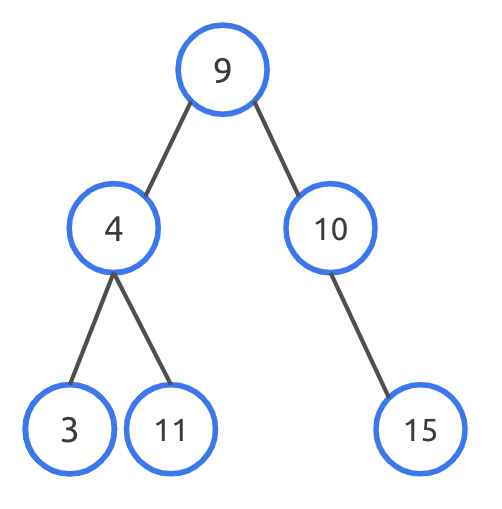

Instead, think of each value in a binary search tree as constraining the range of possible values that can be in its subtree. If you move to `current_node.right`, then every node in that subtree must be greater than `current_node`. If you move to `current_node.left`, every node in that subtree must be less than `current_node`.

To accomplish this, you can modify your recursive wrapper to include a `min_value` and a `max_value` as parameters. But what should they start as? Well, Python 3 doesn't have a `maxint` or `minint`, but you can use `float("inf")` and `float("-inf")` as a rough approximation.

```python
def is_bst(self):
  return self._is_bst_helper(self.root, float("-inf"), float("inf"))

def _is_bst_helper(self, current_node, min_value, max_value):
  # Check that current_node.name is > min_value and < max_value.
  # If so, recurse on current_node.left and current_node.right.
  # If recursing on current_node.left, pass current_node.name as max_value.
  # If recursing on current_node.right, pass current_node.name as min_value.
  pass
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = BinaryTree(Node(4))
tree.root.add_left(2)
tree.root.add_right(5)
print(tree.is_bst())
# Should print: True

tree.root.left.add_left(1)
tree.root.left.add_right(3)
print(tree.is_bst())
# Should print: True

tree.root.left.left.add_left(0)
tree.root.left.left.add_right(6)
print(tree.is_bst())
# Should print: False

### Solution

In [ ]:
class BinaryTree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_inorder(self):
    node_list = []
    self._inorder_helper(self.root, node_list)
    return node_list

  def _inorder_helper(self, current_node, node_list):
    if not current_node:
      return
    self._inorder_helper(current_node.left, node_list)
    node_list.append(current_node)
    self._inorder_helper(current_node.right, node_list)

  def size(self):
    return self._size_helper(self.root)

  def _size_helper(self, current_node):
    if not current_node:
      return 0
    left_count = self._size_helper(current_node.left)
    right_count = self._size_helper(current_node.right)
    return left_count + right_count + 1
  
  def is_bst(self):
    return self._is_bst_helper(self.root, float("-inf"), float("inf"))

  def _is_bst_helper(self, current_node, min_value, max_value):
    if not current_node:
      # Implicitly, a nonexistent node cannot violate the properties of a
      # binary search tree, so if we don't find a node we can just return true.
      return True
    if current_node.name < min_value:
      return False
    if current_node.name > max_value:
      return False
    if not self._is_bst_helper(current_node.left, min_value, current_node.name):
      return False
    if not self._is_bst_helper(current_node.right, current_node.name, max_value):
      return False
    return True

## Question 11

Choose all statements about the following graph that are correct.

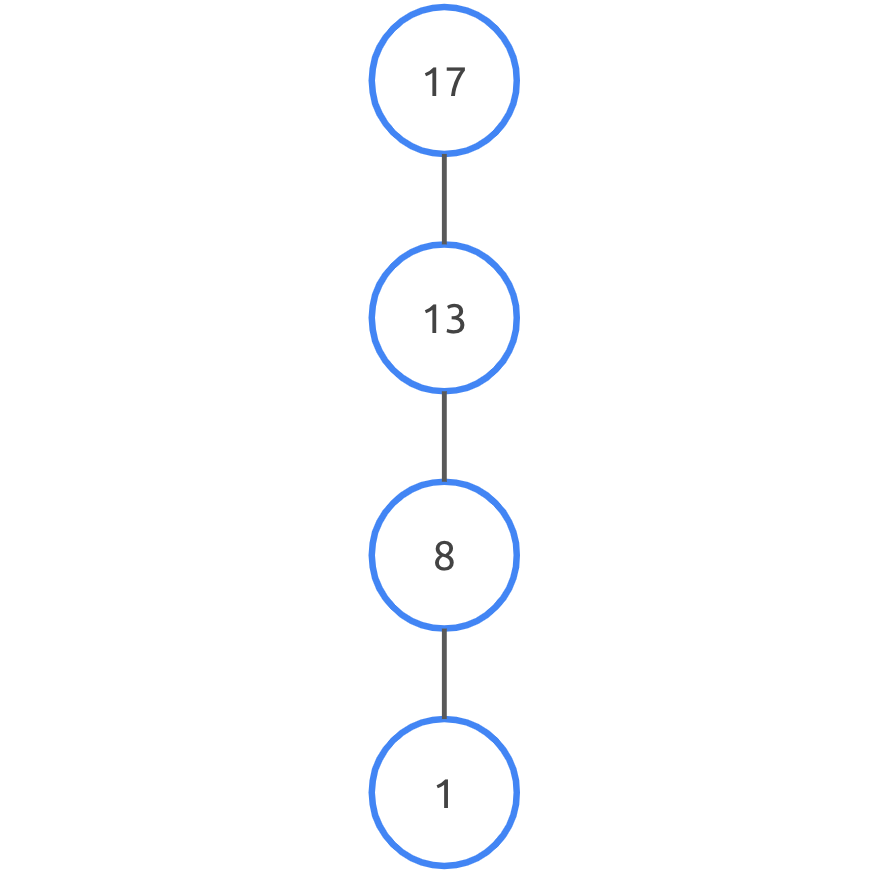

**a)** This graph is a tree.

**b)** This graph is a binary tree.

**c)** This graph is a binary search tree.

**d)** None of the above.

### Solution

The correct answers are **a)**, **b)**, and **c)**.

**d)** Check again; is the relationship between the nodes hierarchical? And are trees required to have a set number of children per node?

## Question 12

Choose all statements about the following graph that are correct.

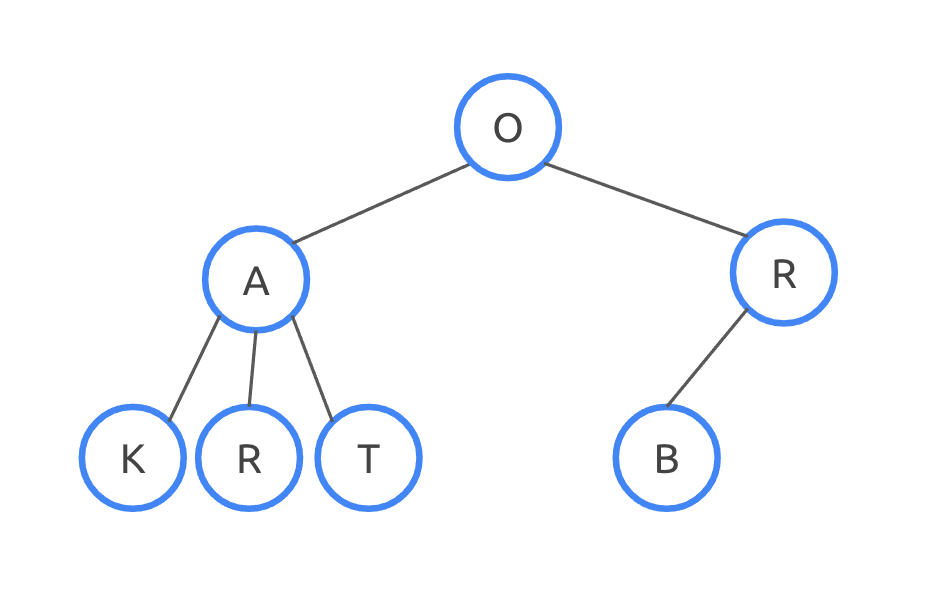

**a)** This graph is a tree.

**b)** This graph is a binary tree.

**c)** This graph is a binary search tree.

**d)** This graph is a trie.

### Solution

The correct answers are **a)** and **d)**.

**b)** The $A$ node has more than two children.

**c)** $A$ has $R$ and $T$ as children, even though they are alphabetically after $O$.

## Question 13

Why is the following tree *not* a binary search tree?

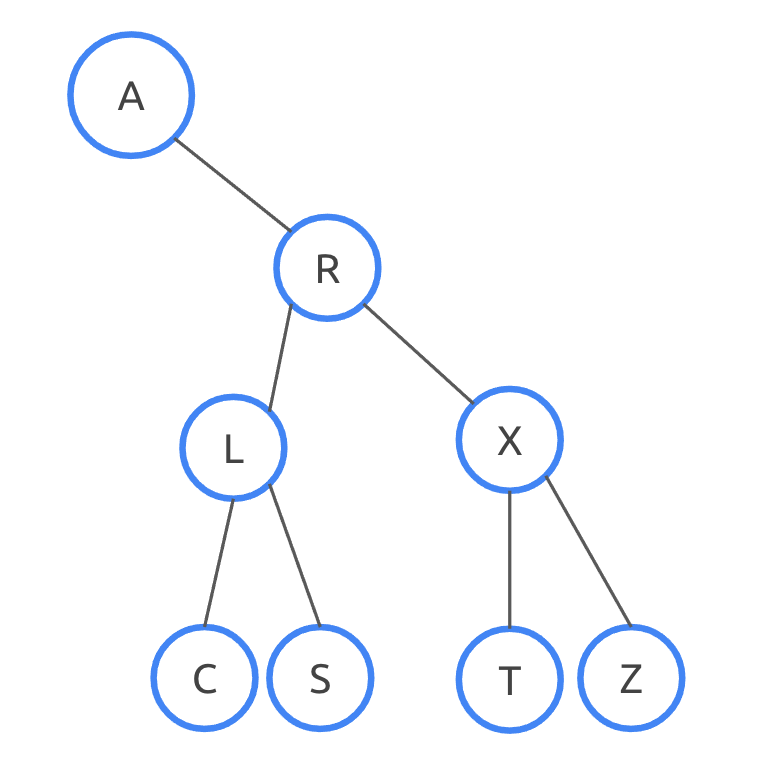

**a)** It uses characters instead of numbers.

**b)** There are too many elements in the right subtree.

**c)** Some of the elements are in an invalid order.

**d)** This tree is a binary search tree.

### Solution

The correct answer is **c)**.

**a)** That is still valid for a binary search tree, as characters can be compared via greater than and less than operations.

**b)** While it may look odd, there are no limits to the number of elements that can be in the right or left subtrees of valid binary search trees.

**d)** Try running your `is_bst` method on this tree, even if it's just by hand.